In [6]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = '/content/electrical-fault-detection-and-classification.zip.zip'

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/electrical_fault_data')

# Check extracted files
os.listdir('/content/electrical_fault_data')


['classData.csv', 'detect_dataset.csv']

In [7]:
import pandas as pd

# Load each dataset
df_class = pd.read_csv('/content/electrical_fault_data/classData.csv')
df_detect = pd.read_csv('/content/electrical_fault_data/detect_dataset.csv')

# Preview first few rows
print("👉 classData.csv")
print(df_class.head(), "\n")

print("👉 detect_dataset.csv")
print(df_detect.head())


👉 classData.csv
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc  
0 -0.267815  
1 -0.189099  
2 -0.151428  
3 -0.130570  
4 -0.113983   

👉 detect_dataset.csv
   Output (S)          Ia        Ib          Ic        Va        Vb        Vc  \
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431   
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202   
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251   
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963   
4           0  -63.885255  0.5906

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/electrical_fault_data/detect_dataset.csv')
df = df.dropna(axis=1, how='all')  # clean any fully-empty columns

# Check full shape
print("✅ Dataset loaded successfully!")
print("Rows and columns:", df.shape)

# Show first 5 rows
df.head()


✅ Dataset loaded successfully!
Rows and columns: (12001, 7)


,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [10]:
# Define input features and output label
X = df.drop(columns=['Output (S)'])
y = df['Output (S)']

# Print to confirm
print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)


✅ Features shape: (12001, 6)
✅ Target shape: (12001,)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (9600, 6)
y_train shape: (9600,)


✅ Accuracy Score: 0.9979175343606831

🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


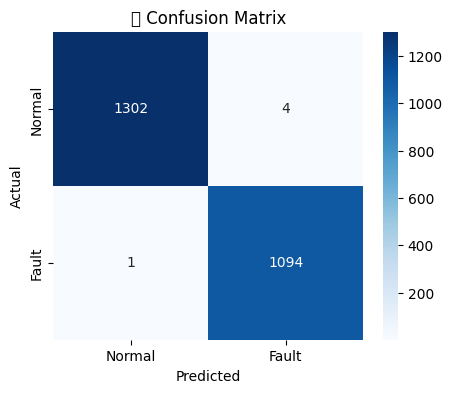

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fault"], yticklabels=["Normal", "Fault"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔍 Confusion Matrix")
plt.show()


In [13]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("✅ SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred_svm))


✅ SVM Accuracy: 0.9837567680133278

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1306
           1       1.00      0.97      0.98      1095

    accuracy                           0.98      2401
   macro avg       0.99      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



In [14]:
!pip install xgboost


In [15]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Create and train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("✅ XGBoost Accuracy:", xgb_accuracy)
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:17:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Accuracy: 0.9975010412328197

🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


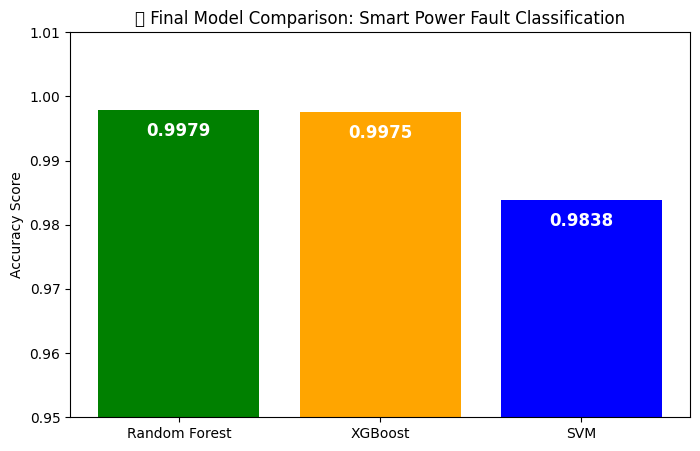

In [16]:
import matplotlib.pyplot as plt

# Final model names and scores
models = ['Random Forest', 'XGBoost', 'SVM']
accuracies = [0.9979, 0.9975, 0.9838]  # Replace with exact values if different

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['green', 'orange', 'blue'])
plt.ylim(0.95, 1.01)
plt.ylabel("Accuracy Score")
plt.title("✅ Final Model Comparison: Smart Power Fault Classification")

# Annotate values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc - 0.004, f'{acc:.4f}',
             ha='center', color='white', fontsize=12, fontweight='bold')

plt.show()
